In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'
dataset = pd.read_csv(r"./Datasets/FTSE/FTSE_MFADCCA.csv")
df = dataset.reset_index(drop=True)
df

Unnamed: 0.1  Unnamed: 0        Date     Open     High      Low  \
0                0       262.0   2013/1/16  6117.31  6117.33  6076.12   
1                1       263.0   2013/1/17  6103.98  6135.89  6087.49   
2                2       264.0   2013/1/18  6132.36  6172.49  6131.93   
3                3       265.0   2013/1/21  6154.41  6182.23  6154.41   
4                4       266.0   2013/1/22  6180.98  6188.58  6149.18   
...            ...         ...         ...      ...      ...      ...   
1247          1247      1509.0  2017/12/19  7537.01  7563.49  7534.08   
1248          1248      1510.0  2017/12/20  7544.09  7550.60  7511.45   
1249          1249      1511.0  2017/12/21  7525.22  7609.69  7517.88   
1250          1250      1512.0  2017/12/22  7603.98  7614.40  7585.47   
1251          1251      1513.0  2017/12/27  7592.66  7632.71  7586.42   

        Close        QPLp1        QPLp2        QPLp3  ...       QPLn19  \
0     6103.98  6128.378177  6154.260438  6186.265987  ...  5341.755737   
1     6132.36  6115.024059  6140.849921  6172.785728  ...  5330.115718   
2     6154.41  6143.455408  6169.401345  6201.485635  ...  5354.897694   
3     6180.98  6165.545303  6191.584534  6223.784189  ...  5374.152189   
4     6179.17  6192.163377  6218.315025  6250.653693  ...  5397.353637   
...       ...          ...          ...          ...  ...          ...   
1247  7544.09  7550.646870  7582.535864  7621.969233  ...  6581.465776   
1248  7525.22  7557.739680  7589.658630  7629.129041  ...  6587.648172   
1249  7603.98  7538.835539  7570.674649  7610.046333  ...  6571.170516   
1250  7592.66  7617.738041  7649.910384  7689.694137  ...  6639.945301   
1251  7620.68  7606.397559  7638.522007  7678.246535  ...  6630.060454   

           QPLn20       QPLn21     vol  log_returns  volatility_increments  \
0     5294.004118  5246.330294  818.41    -0.002181              -0.209724   
1     5282.468153  5234.898213  622.93     0.004639               0.148450   
2     5307.028595  5259.237482  713.50     0.003589               0.230006   
3     5326.110968  5278.148014  401.15     0.004308               0.090124   
4     5349.105011  5300.934990  558.35    -0.000293              -0.023011   
...           ...          ...     ...          ...                    ...   
1247  6522.632003  6463.894080  695.72     0.000939              -0.211883   
1248  6528.759133  6469.966032  679.71    -0.002504              -0.005441   
1249  6512.428775  6453.782734  640.56     0.010412               0.120333   
1250  6580.588761  6521.328923  251.37    -0.001490              -0.111929   
1251  6570.792278  6511.620659  472.51     0.003684              -0.214799   

      log_volumes     hurst    hurstp    hurstm  
0        0.154856  0.233005  0.066911  0.186730  
1       -0.272929  0.377368  0.127500  0.689103  
2        0.135748  0.356925 -0.113250  0.835307  
3       -0.575847  0.360074  0.034885  0.600312  
4        0.330651  0.255906 -0.133938  0.809655  
...           ...       ...       ...       ...  
1247     0.172379  0.471912  0.508476  0.518403  
1248    -0.023281  0.442518  0.415256  0.570028  
1249    -0.059323  0.433949  0.310211  0.638947  
1250    -0.935417  0.337532  0.174711  0.487677  
1251     0.631133  0.229026  0.034128  0.502412  

[1252 rows x 56 columns]

In [2]:
maxLevel = 21                           
maxTP = 1                
maxTS = 4096             
nTP = 0                    
p3 = 1.0 / 3.0          

stime = 0
etime = 0
Gstime = 0
Getime = 0
tlapse = 0
Gtlapse = 0

day = 2261

DT_DT= np.zeros((day,1))

DT_OP= np.zeros((day,1))
DT_HI= np.zeros((day,1))
DT_LO= np.zeros((day,1))
DT_CL= np.zeros((day,1))
DT_VL= np.zeros((day,1))

cHurst= np.zeros((day,1))
oHurst= np.zeros((day,1))
hHurst= np.zeros((day,1))
lHurst= np.zeros((day,1))
DT_RT= np.zeros((day,1))

Q= np.zeros((100,1))
NQ= np.zeros((100,1))
r= np.zeros((100,1))


QFEL = np.zeros((21,1))       
QPR = np.zeros((21,1))       
NQPR = np.zeros((21,1))      
K = np.zeros((21,1))


ALL_Pos_QPL = np.zeros((day,21))
ALL_Neg_QPL = np.zeros((day,21))

print("Printout ALL K values K0 .. K20 for first 20 Levels")
for L in range(0,21):    
    K[L] = math.pow((1.1924 + (33.2383 * L) + (56.2169 * L * L)) / (1 + (43.6106 * L)), p3)
    print("Level ",L, " K",L, " = ", K[L])   

Printout ALL K values K0 .. K20 for first 20 Levels
Level  0  K 0  =  [1.06041043]
Level  1  K 1  =  [1.2665998]
Level  2  K 2  =  [1.4911995]
Level  3  K 3  =  [1.66349934]
Level  4  K 4  =  [1.80609901]
Level  5  K 5  =  [1.92919156]
Level  6  K 6  =  [2.03832293]
Level  7  K 7  =  [2.13688129]
Level  8  K 8  =  [2.22710524]
Level  9  K 9  =  [2.31055991]
Level  10  K 10  =  [2.38838747]
Level  11  K 11  =  [2.46144992]
Level  12  K 12  =  [2.53041565]
Level  13  K 13  =  [2.59581465]
Level  14  K 14  =  [2.65807505]
Level  15  K 15  =  [2.71754825]
Level  16  K 16  =  [2.77452666]
Level  17  K 17  =  [2.82925649]
Level  18  K 18  =  [2.88194724]
Level  19  K 19  =  [2.93277882]
Level  20  K 20  =  [2.98190702]


In [3]:
DT_DT = df['Date']     
DT_OP = df['Open']
DT_HI = df['High']
DT_LO = df['Low']
DT_CL = df['Close']
hurst = df['hurst']
hurstp = df['hurstp']
hurstm = df['hurstm']
TSsize = df.shape[0]

TSsize

1252

In [4]:
# For Hurst
maxRno = TSsize - 2

for d in range (0,TSsize - 2):
    if (DT_CL[d + 1] > 0):
        DT_RT[d] = DT_CL[d] / DT_CL[d + 1]          
    else:
        DT_RT[d] = 1
        
mu = 0
for d in range(0,maxRno):
    mu = mu + DT_RT[d]
mu = mu / maxRno

sigma = 0
for d in range(0,maxRno):
    sigma = sigma + (DT_RT[d] - mu) * (DT_RT[d] - mu)
    
sigma = math.sqrt((sigma/ maxRno))

dr = 3 * sigma/ 50

auxR = 0
tQno = 0
num = 0

for nR in range (0,maxRno):    
    bFound = False
    nQ = 0
    # Get the start position of the wave function.
    auxR = 1 - (dr * 50)
    # Get the total number of the returns in each range of each segment of the wave function.
    while((bFound == False) and (nQ < 100)):
        
        if ((DT_RT[nR] > auxR) and (DT_RT[nR] <= (auxR + dr))):
            
            Q[nQ] = Q[nQ] + 1
            tQno= tQno + 1
            bFound = True
        else:
            num = num+1
            nQ = nQ + 1
            auxR = auxR + dr

auxR = 1 - (dr * 50)
for nQ in range(0,100):
    r[nQ] = auxR
    NQ[nQ] = Q[nQ] / tQno        
    auxR = auxR + dr

maxQ = 0
maxQno = 0

for nQ in range(0,100):     
    if (NQ[nQ] > maxQ):
        maxQ = NQ[nQ]
        maxQno = nQ

for i in range(0,day):     
    r0 = r[maxQno] - (dr / 2)
    r1 = r0 + dr
    rn1 = r0 - dr
    
for i in range(0,day):  
    Lup = (pow(rn1, 2) * NQ[maxQno - 1]) - (pow(r1, 2) * NQ[maxQno + 1])
    Ldw = (pow(rn1, 4) * NQ[maxQno - 1]) - (pow(r1, 4) * NQ[maxQno + 1])

L = abs(Lup / Ldw)

for eL in range(0,21):
    p = -1 * pow((2 * eL + 1), 2)
    q = -1 * L * pow((2 * eL + 1), 3) * pow(K[eL], 3)
    u = pow((-0.5 * q + np.sqrt(((q * q / 4.0) + (p * p * p / 27.0)))), p3)
    v = pow((-0.5 * q - np.sqrt(((q * q / 4.0) + (p * p * p / 27.0)))), p3)
    QFEL[eL] = u + v

for eL in range(0,21):
# Compute the QPR.  
    QPR[eL] = QFEL[eL] / QFEL[0]
#Compute the NQPR.
    NQPR[eL] = 1 + 0.21 * sigma * QPR[eL]

cQHLdata = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "cQHLp1", "cQHLp2", "cQHLp3", "cQHLp4", "cQHLp5", "cQHLp6", "cQHLp7", "cQHLp8",
      "cQHLp9", "cQHLp10", "cQHLp11", "cQHLp12", "cQHLp13", "cQHLp14", "cQHLp15", "cQHLp16", "cQHLp17", "cQHLp18", "cQHLp19", "cQHLp20", "cQHLp21", "cQHLn1", "cQHLn2",
      "cQHLn3", "cQHLn4", "cQHLn5", "cQHLn6", "cQHLn7", "cQHLn8", "cQHLn9", "cQHLn10", "cQHLn11", "cQHLn12", "cQHLn13", "cQHLn14", "cQHLn15", "cQHLn16",
      "cQHLn17", "cQHLn18", "cQHLn19", "cQHLn20", "cQHLn21"])

for d in range(0,TSsize):
    for eL in range(0,21):
        ALL_Pos_QPL[d][eL] = hurst[d] * NQPR[eL]
        ALL_Neg_QPL[d][eL] = hurst[d] / NQPR[eL]

cQHLdata.Date= DT_DT
cQHLdata.Open= DT_OP
cQHLdata.High= DT_HI
cQHLdata.Low = DT_LO
cQHLdata.Close = DT_CL
cqhlv = cQHLdata.values

for d in range(0,TSsize - 2):
    for eL in range(0,21):
        cqhlv[d][eL+5] = ALL_Pos_QPL[d][eL]
        cqhlv[d][eL+26] = ALL_Neg_QPL[d][eL]

cQHLdata = pd.DataFrame(cqhlv,columns=["Date", "Open", "High", "Low", "Close", "cQHLp1", "cQHLp2", "cQHLp3", "cQHLp4", "cQHLp5", "cQHLp6", "cQHLp7", "cQHLp8",
      "cQHLp9", "cQHLp10", "cQHLp11", "cQHLp12", "cQHLp13", "cQHLp14", "cQHLp15", "cQHLp16", "cQHLp17", "cQHLp18", "cQHLp19", "cQHLp20", "cQHLp21", "cQHLn1", "cQHLn2",
      "cQHLn3", "cQHLn4", "cQHLn5", "cQHLn6", "cQHLn7", "cQHLn8", "cQHLn9", "cQHLn10", "cQHLn11", "cQHLn12", "cQHLn13", "cQHLn14", "cQHLn15", "cQHLn16",
      "cQHLn17", "cQHLn18", "cQHLn19", "cQHLn20", "cQHLn21"])

dfc = pd.DataFrame(cQHLdata)
dfc.to_csv("./Datasets/FTSE/FTSE_qhl.csv",index = True)

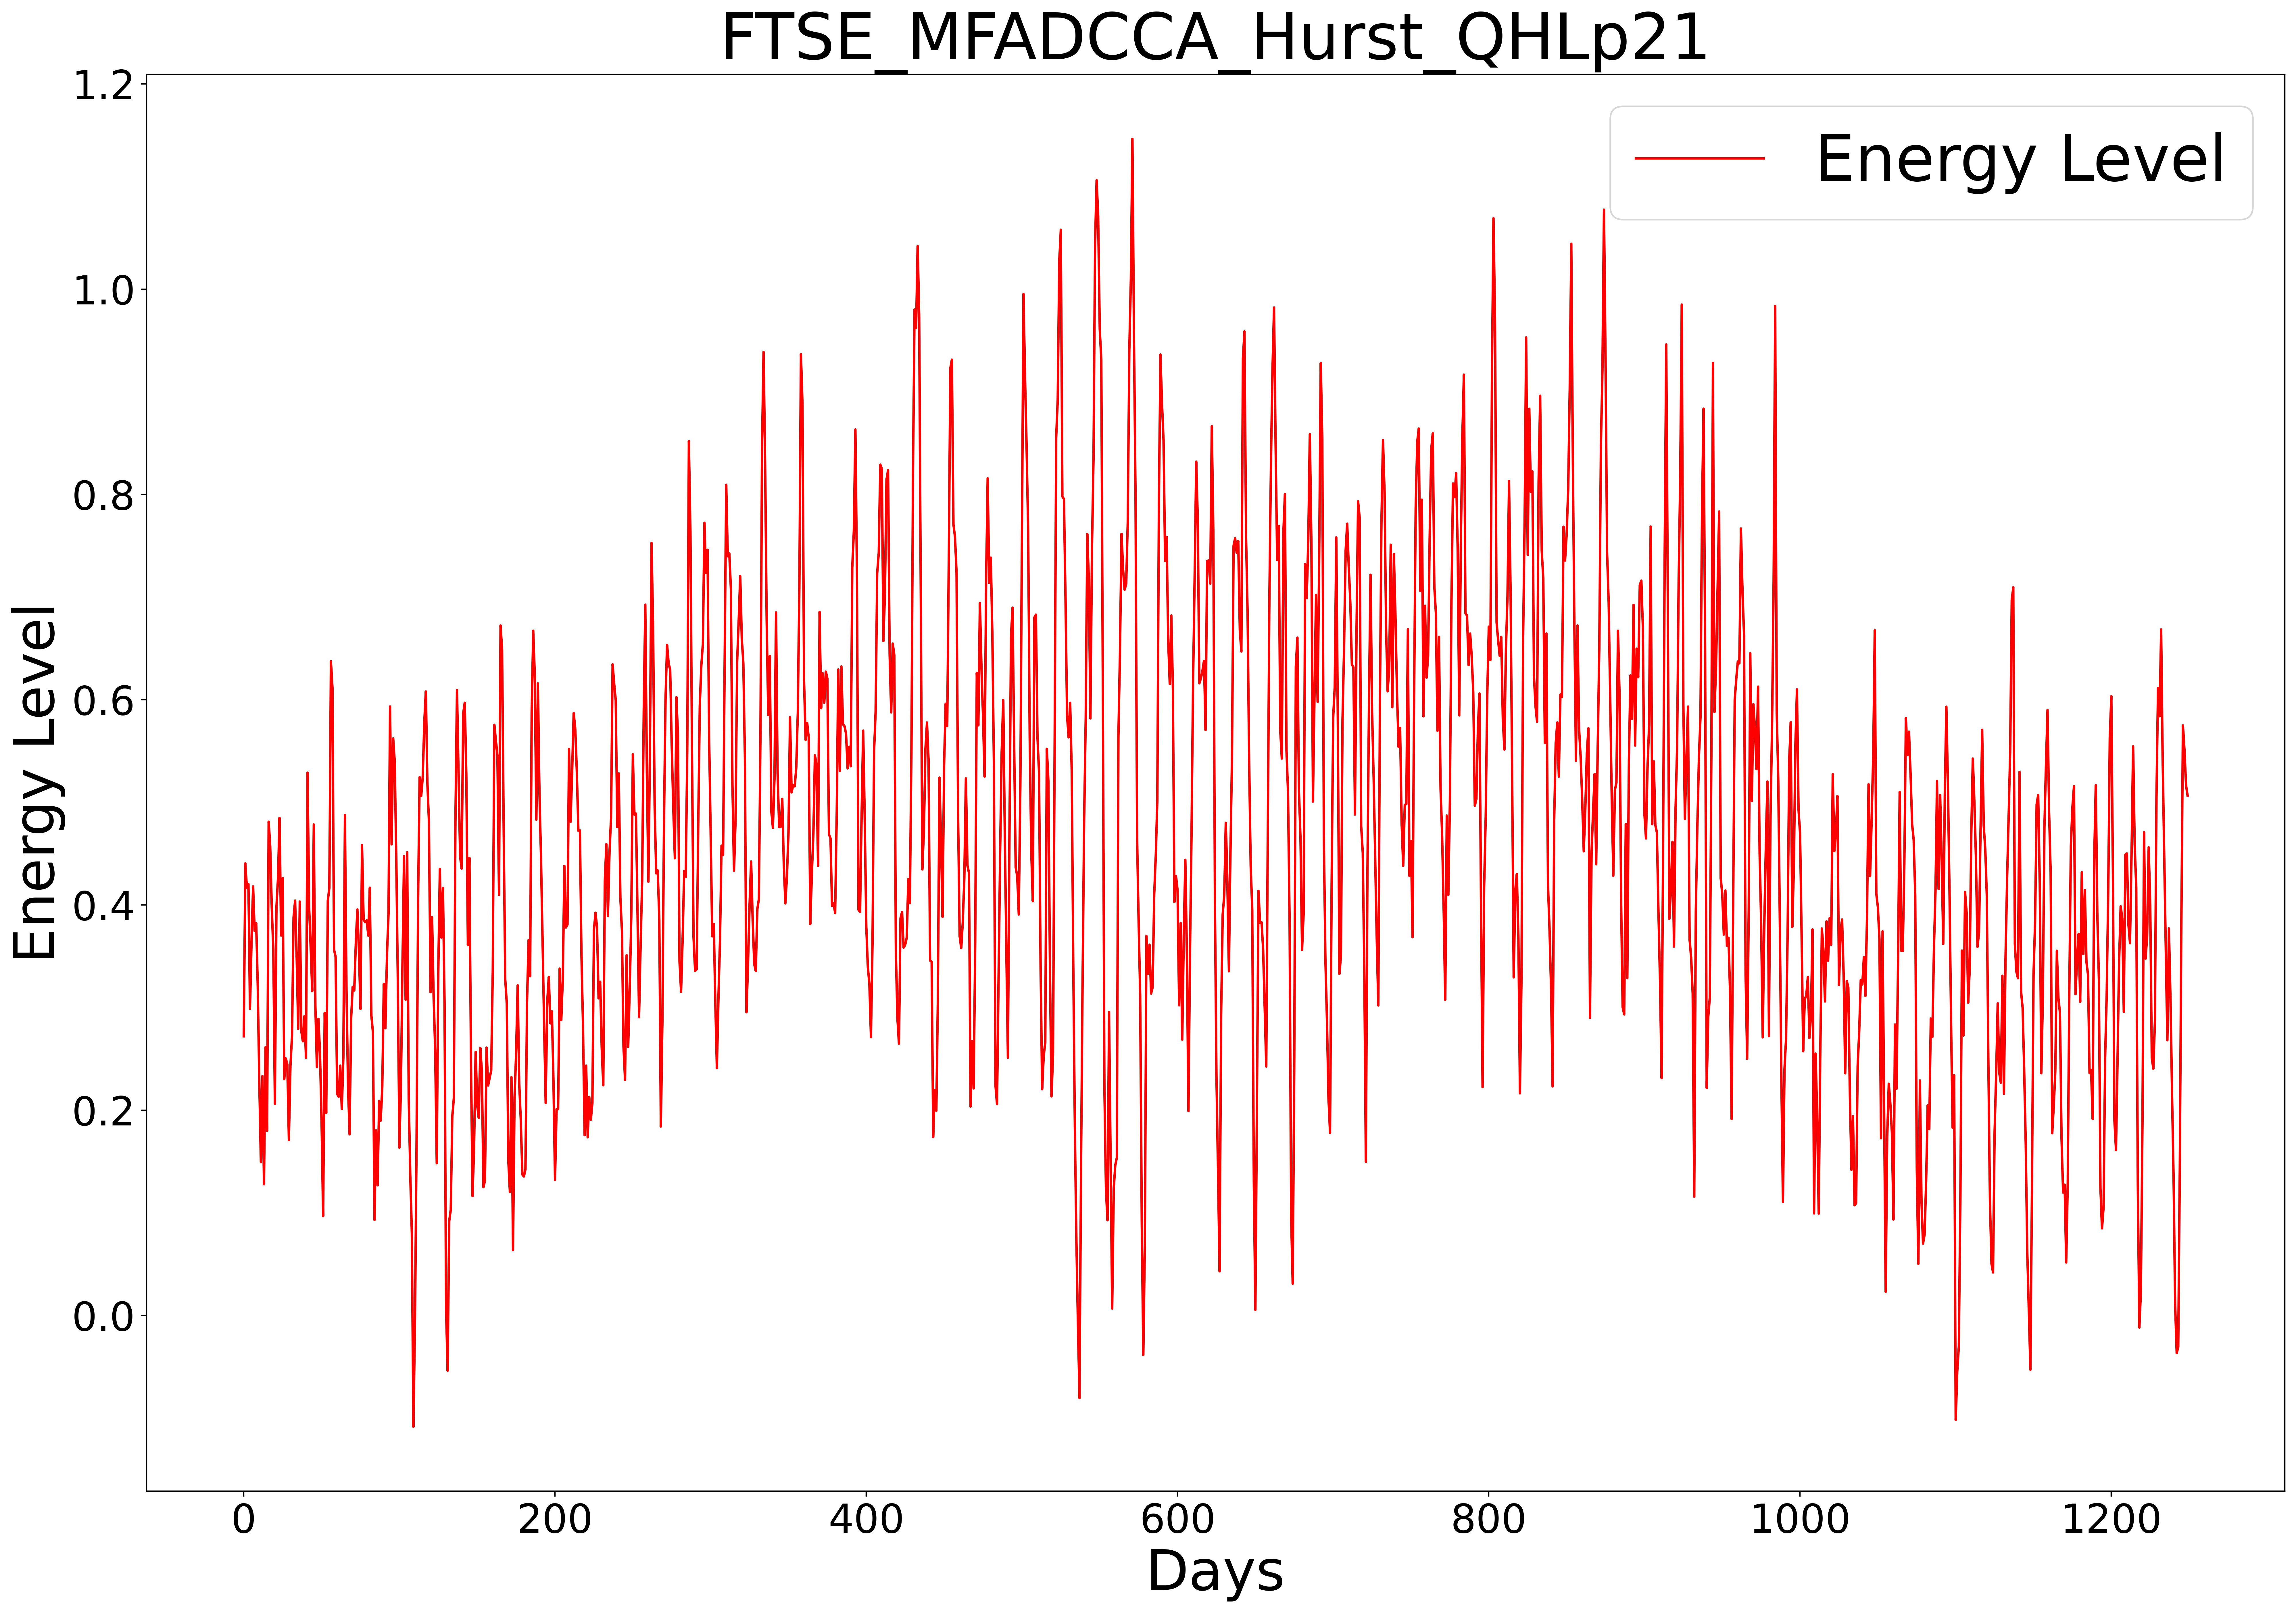

In [5]:
qplp21 = cQHLdata["cQHLp21"]
qpln21 = cQHLdata["cQHLn21"]

plt.figure(figsize=(24, 16), dpi=400)
plt.plot(qplp21,color='r')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Days', fontsize=35)
plt.ylabel('Energy Level', fontsize=35)
plt.title('FTSE_MFADCCA_Hurst_QHLp21', fontsize=40)
plt.legend(['Energy Level'],fontsize=40)
plt.savefig('./pic/FTSE_pic/FTSE_MFADCCA_Hurst_QHLp21.png')
plt.show()

In [6]:
# For hurstplus
maxRno = TSsize - 2

for d in range (0,TSsize - 2):
    if (DT_OP[d + 1] > 0):
        DT_RT[d] = DT_OP[d] / DT_OP[d + 1]          
    else:
        DT_RT[d] = 1
        
mu = 0
for d in range(0,maxRno):
    mu = mu + DT_RT[d]
mu = mu / maxRno

sigma = 0
for d in range(0,maxRno):
    sigma = sigma + (DT_RT[d] - mu) * (DT_RT[d] - mu)
    
sigma = math.sqrt((sigma/ maxRno))

dr = 3 * sigma/ 50

auxR = 0
tQno = 0
num = 0

for nR in range (0,maxRno):    
    bFound = False
    nQ = 0
    # Get the start position of the wave function.
    auxR = 1 - (dr * 50)
    # Get the total number of the returns in each range of each segment of the wave function.
    while((bFound == False) and (nQ < 100)):
        
        if ((DT_RT[nR] > auxR) and (DT_RT[nR] <= (auxR + dr))):
            
            Q[nQ] = Q[nQ] + 1
            tQno= tQno + 1
            bFound = True
        else:
            num = num+1
            nQ = nQ + 1
            auxR = auxR + dr

auxR = 1 - (dr * 50)
for nQ in range(0,100):
    r[nQ] = auxR
    NQ[nQ] = Q[nQ] / tQno        
    auxR = auxR + dr

maxQ = 0
maxQno = 0

for nQ in range(0,100):     
    if (NQ[nQ] > maxQ):
        maxQ = NQ[nQ]
        maxQno = nQ

for i in range(0,day):     
    r0 = r[maxQno] - (dr / 2)
    r1 = r0 + dr
    rn1 = r0 - dr
    
for i in range(0,day):  
    Lup = (pow(rn1, 2) * NQ[maxQno - 1]) - (pow(r1, 2) * NQ[maxQno + 1])
    Ldw = (pow(rn1, 4) * NQ[maxQno - 1]) - (pow(r1, 4) * NQ[maxQno + 1])

L = abs(Lup / Ldw)

for eL in range(0,21):
    p = -1 * pow((2 * eL + 1), 2)
    q = -1 * L * pow((2 * eL + 1), 3) * pow(K[eL], 3)
    u = pow((-0.5 * q + np.sqrt(((q * q / 4.0) + (p * p * p / 27.0)))), p3)
    v = pow((-0.5 * q - np.sqrt(((q * q / 4.0) + (p * p * p / 27.0)))), p3)
    QFEL[eL] = u + v

for eL in range(0,21):
# Compute the QPR.  
    QPR[eL] = QFEL[eL] / QFEL[0]
#Compute the NQPR.
    NQPR[eL] = 1 + 0.21 * sigma * QPR[eL]

cQHLdata = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "oQHLp1", "oQHLp2", "oQHLp3", "oQHLp4", "oQHLp5", "oQHLp6", "oQHLp7", "oQHLp8",
      "oQHLp9", "oQHLp10", "oQHLp11", "oQHLp12", "oQHLp13", "oQHLp14", "oQHLp15", "oQHLp16", "oQHLp17", "oQHLp18", "oQHLp19", "oQHLp20", "oQHLp21", "oQHLn1", "oQHLn2",
      "oQHLn3", "oQHLn4", "oQHLn5", "oQHLn6", "oQHLn7", "oQHLn8", "oQHLn9", "oQHLn10", "oQHLn11", "oQHLn12", "oQHLn13", "oQHLn14", "oQHLn15", "oQHLn16",
      "oQHLn17", "oQHLn18", "oQHLn19", "oQHLn20", "oQHLn21"])

for d in range(0,TSsize):
    for eL in range(0,21):
        ALL_Pos_QPL[d][eL] = hurstp[d] * NQPR[eL]
        ALL_Neg_QPL[d][eL] = hurstp[d] / NQPR[eL]

cQHLdata.Date= DT_DT
cQHLdata.Open= DT_OP
cQHLdata.High= DT_HI
cQHLdata.Low = DT_LO
cQHLdata.Close = DT_CL
cqhlv = cQHLdata.values

for d in range(0,TSsize - 2):
    for eL in range(0,21):
        cqhlv[d][eL+5] = ALL_Pos_QPL[d][eL]
        cqhlv[d][eL+26] = ALL_Neg_QPL[d][eL]

cQHLdata = pd.DataFrame(cqhlv,columns=["Date", "Open", "High", "Low", "Close", "oQHLp1", "oQHLp2", "oQHLp3", "oQHLp4", "oQHLp5", "oQHLp6", "oQHLp7", "oQHLp8",
      "oQHLp9", "oQHLp10", "oQHLp11", "oQHLp12", "oQHLp13", "oQHLp14", "oQHLp15", "oQHLp16", "oQHLp17", "oQHLp18", "oQHLp19", "oQHLp20", "oQHLp21", "oQHLn1", "oQHLn2",
      "oQHLn3", "oQHLn4", "oQHLn5", "oQHLn6", "oQHLn7", "oQHLn8", "oQHLn9", "oQHLn10", "oQHLn11", "oQHLn12", "oQHLn13", "oQHLn14", "oQHLn15", "oQHLn16",
      "oQHLn17", "oQHLn18", "oQHLn19", "oQHLn20", "oQHLn21"])

dfc = pd.DataFrame(cQHLdata)
dfc.to_csv("./Datasets/FTSE/FTSE_qhlp.csv",index = True)

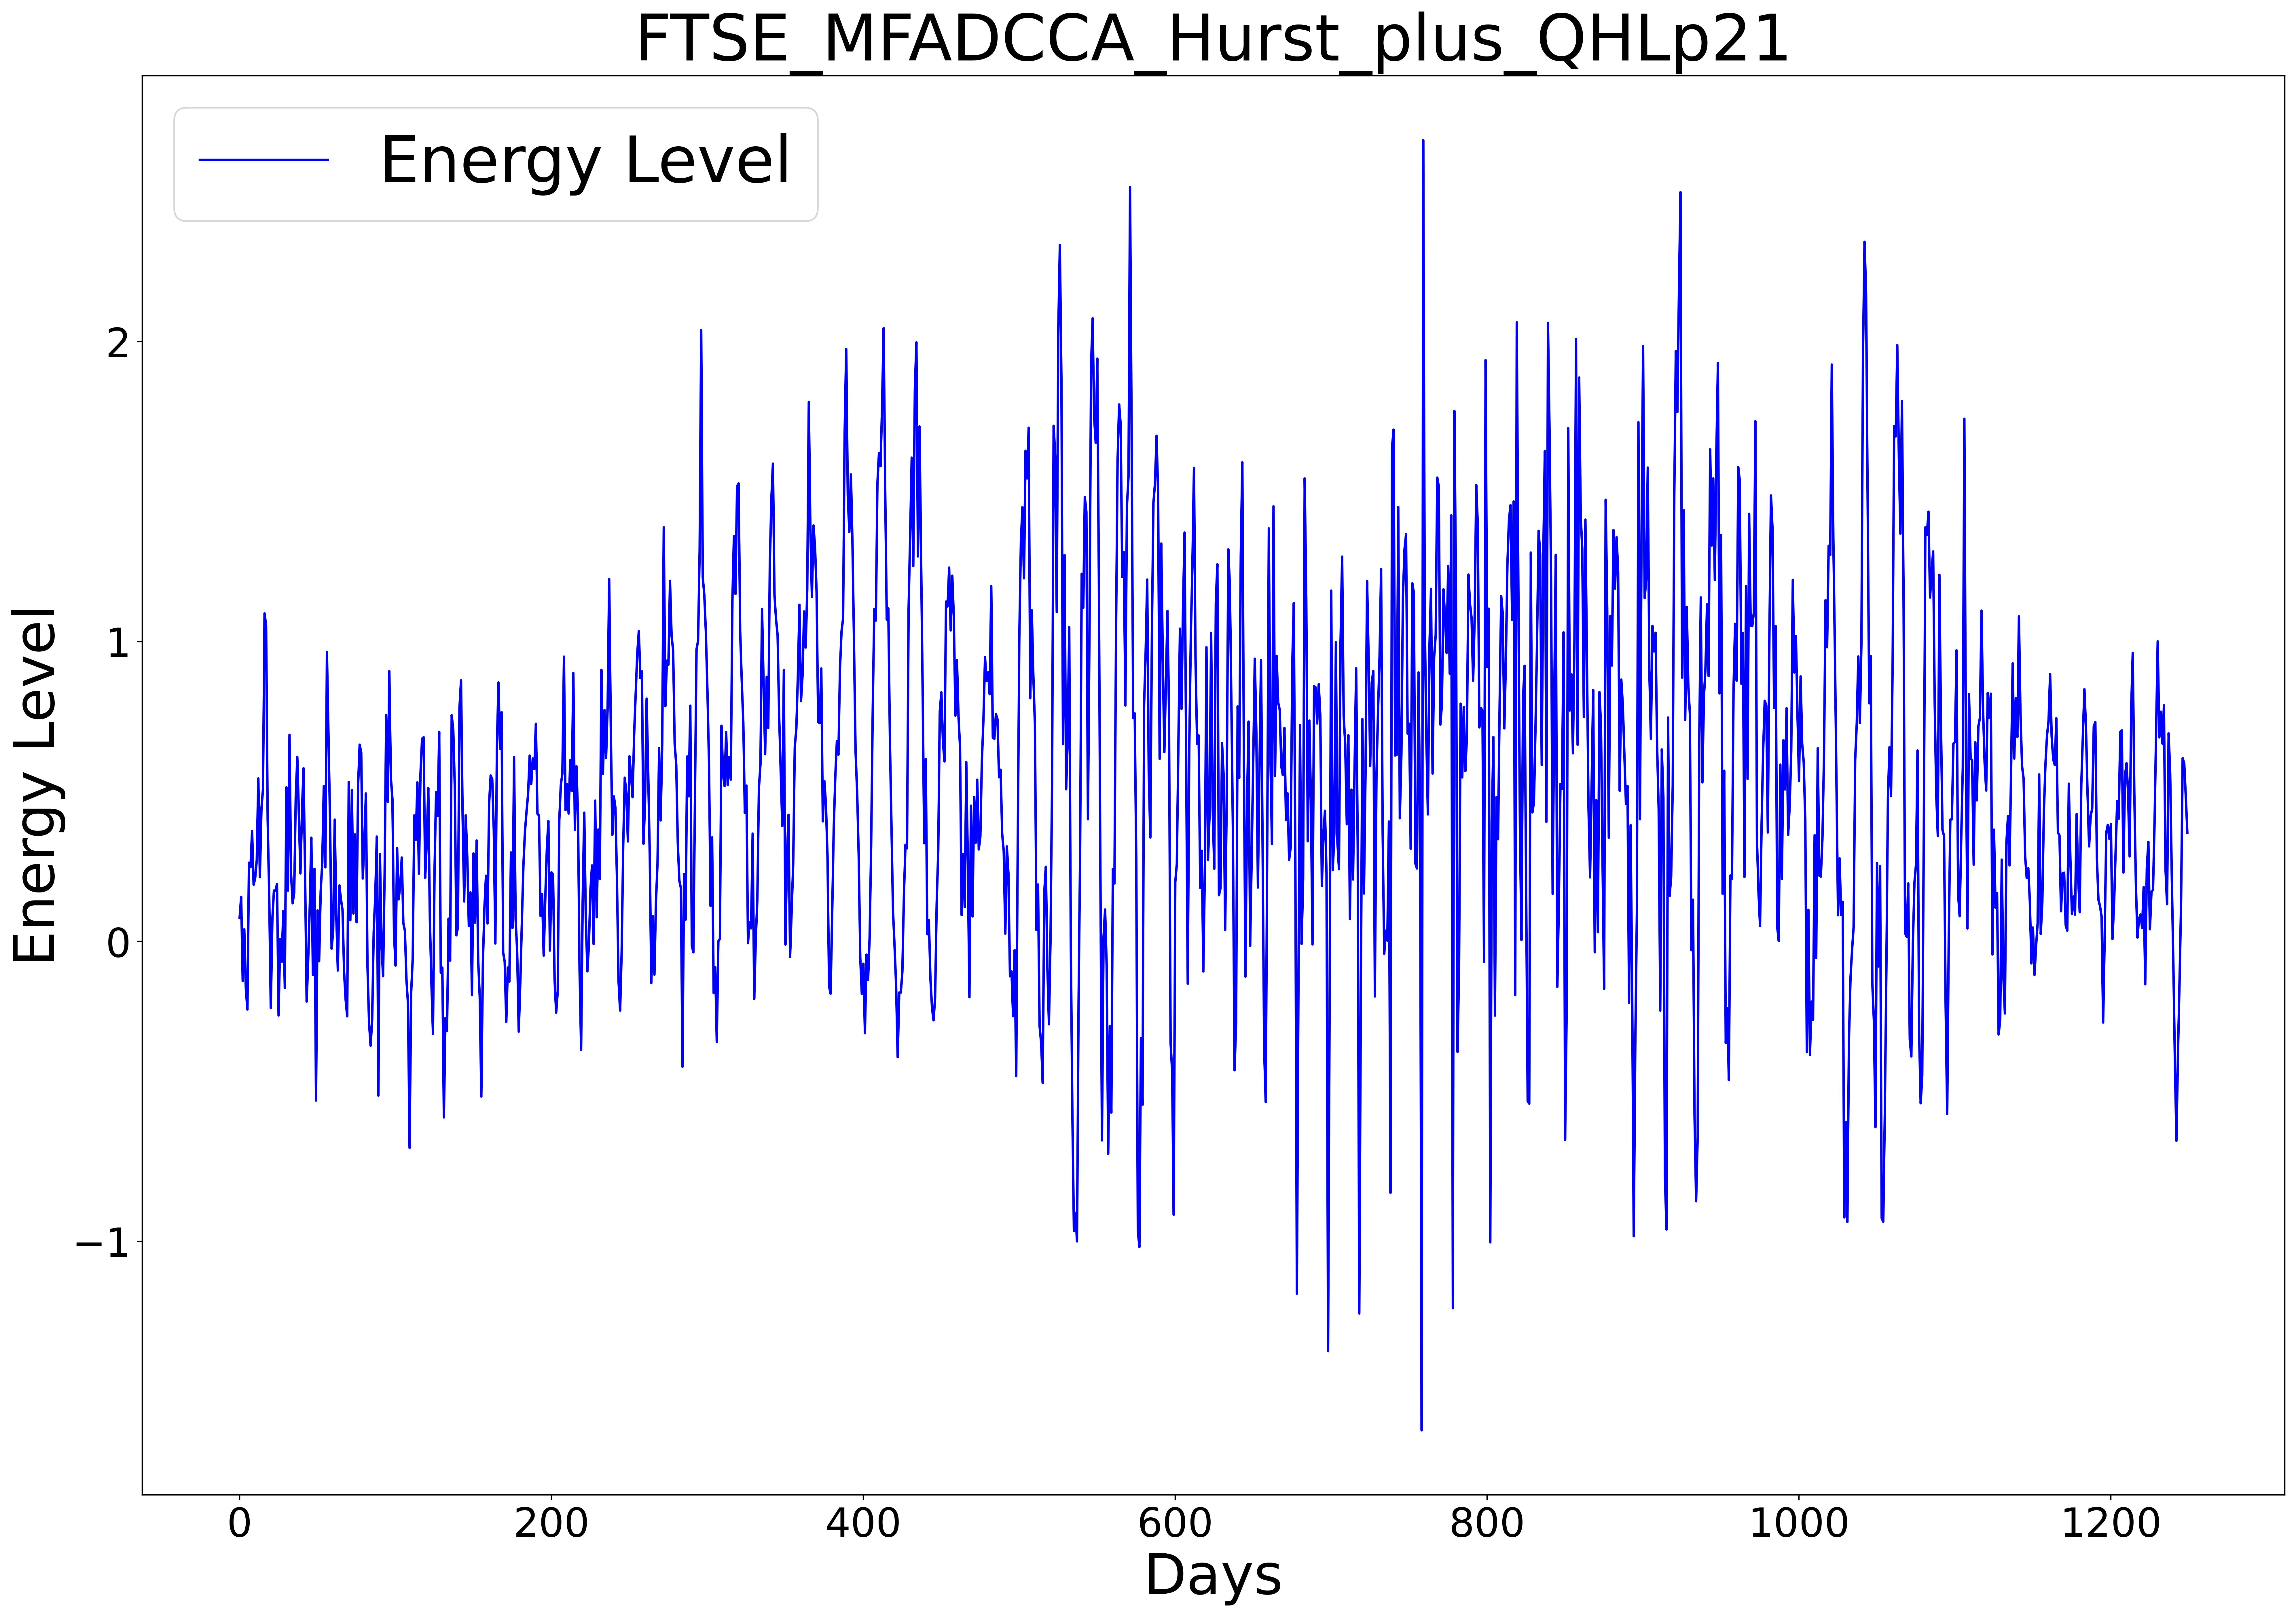

In [7]:
qplp21 = cQHLdata["oQHLp21"]
qpln21 = cQHLdata["oQHLn21"]

plt.figure(figsize=(24, 16), dpi=400)
plt.plot(qplp21,color='b')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Days', fontsize=35)
plt.ylabel('Energy Level', fontsize=35)
plt.title('FTSE_MFADCCA_Hurst_plus_QHLp21', fontsize=40)
plt.legend(['Energy Level'],fontsize=40)
plt.savefig('./pic/FTSE_pic/FTSE_MFADCCA_Hurst_plus_QHLp21.png')
plt.show()

In [8]:
# For hurstminus
maxRno = TSsize - 2

for d in range (0,TSsize - 2):
    if (DT_HI[d + 1] > 0):
        DT_RT[d] = DT_HI[d] / DT_HI[d + 1]          
    else:
        DT_RT[d] = 1
        
mu = 0
for d in range(0,maxRno):
    mu = mu + DT_RT[d]
mu = mu / maxRno

sigma = 0
for d in range(0,maxRno):
    sigma = sigma + (DT_RT[d] - mu) * (DT_RT[d] - mu)
    
sigma = math.sqrt((sigma/ maxRno))

dr = 3 * sigma/ 50

auxR = 0
tQno = 0
num = 0

for nR in range (0,maxRno):    
    bFound = False
    nQ = 0
    # Get the start position of the wave function.
    auxR = 1 - (dr * 50)
    # Get the total number of the returns in each range of each segment of the wave function.
    while((bFound == False) and (nQ < 100)):
        
        if ((DT_RT[nR] > auxR) and (DT_RT[nR] <= (auxR + dr))):
            
            Q[nQ] = Q[nQ] + 1
            tQno= tQno + 1
            bFound = True
        else:
            num = num+1
            nQ = nQ + 1
            auxR = auxR + dr

auxR = 1 - (dr * 50)
for nQ in range(0,100):
    r[nQ] = auxR
    NQ[nQ] = Q[nQ] / tQno        
    auxR = auxR + dr

maxQ = 0
maxQno = 0

for nQ in range(0,100):     
    if (NQ[nQ] > maxQ):
        maxQ = NQ[nQ]
        maxQno = nQ

for i in range(0,day):     
    r0 = r[maxQno] - (dr / 2)
    r1 = r0 + dr
    rn1 = r0 - dr
    
for i in range(0,day):  
    Lup = (pow(rn1, 2) * NQ[maxQno - 1]) - (pow(r1, 2) * NQ[maxQno + 1])
    Ldw = (pow(rn1, 4) * NQ[maxQno - 1]) - (pow(r1, 4) * NQ[maxQno + 1])

L = abs(Lup / Ldw)

for eL in range(0,21):
    p = -1 * pow((2 * eL + 1), 2)
    q = -1 * L * pow((2 * eL + 1), 3) * pow(K[eL], 3)
    u = pow((-0.5 * q + np.sqrt(((q * q / 4.0) + (p * p * p / 27.0)))), p3)
    v = pow((-0.5 * q - np.sqrt(((q * q / 4.0) + (p * p * p / 27.0)))), p3)
    QFEL[eL] = u + v

for eL in range(0,21):
# Compute the QPR.  
    QPR[eL] = QFEL[eL] / QFEL[0]
#Compute the NQPR.
    NQPR[eL] = 1 + 0.21 * sigma * QPR[eL]

cQHLdata = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "hQHLp1", "hQHLp2", "hQHLp3", "hQHLp4", "hQHLp5", "hQHLp6", "hQHLp7", "hQHLp8",
      "hQHLp9", "hQHLp10", "hQHLp11", "hQHLp12", "hQHLp13", "hQHLp14", "hQHLp15", "hQHLp16", "hQHLp17", "hQHLp18", "hQHLp19", "hQHLp20", "hQHLp21", "hQHLn1", "hQHLn2",
      "hQHLn3", "hQHLn4", "hQHLn5", "hQHLn6", "hQHLn7", "hQHLn8", "hQHLn9", "hQHLn10", "hQHLn11", "hQHLn12", "hQHLn13", "hQHLn14", "hQHLn15", "hQHLn16",
      "hQHLn17", "hQHLn18", "hQHLn19", "hQHLn20", "hQHLn21"])

for d in range(0,TSsize):
    for eL in range(0,21):
        ALL_Pos_QPL[d][eL] = hurstm[d] * NQPR[eL]
        ALL_Neg_QPL[d][eL] = hurstm[d] / NQPR[eL]

cQHLdata.Date= DT_DT
cQHLdata.Open= DT_OP
cQHLdata.High= DT_HI
cQHLdata.Low = DT_LO
cQHLdata.Close = DT_CL
cqhlv = cQHLdata.values

for d in range(0,TSsize - 2):
    for eL in range(0,21):
        cqhlv[d][eL+5] = ALL_Pos_QPL[d][eL]
        cqhlv[d][eL+26] = ALL_Neg_QPL[d][eL]

cQHLdata = pd.DataFrame(cqhlv,columns=["Date", "Open", "High", "Low", "Close", "hQHLp1", "hQHLp2", "hQHLp3", "hQHLp4", "hQHLp5", "hQHLp6", "hQHLp7", "hQHLp8",
      "hQHLp9", "hQHLp10", "hQHLp11", "hQHLp12", "hQHLp13", "hQHLp14", "hQHLp15", "hQHLp16", "hQHLp17", "hQHLp18", "hQHLp19", "hQHLp20", "hQHLp21", "hQHLn1", "hQHLn2",
      "hQHLn3", "hQHLn4", "hQHLn5", "hQHLn6", "hQHLn7", "hQHLn8", "hQHLn9", "hQHLn10", "hQHLn11", "hQHLn12", "hQHLn13", "hQHLn14", "hQHLn15", "hQHLn16",
      "hQHLn17", "hQHLn18", "hQHLn19", "hQHLn20", "hQHLn21"])

dfc = pd.DataFrame(cQHLdata)
dfc.to_csv("./Datasets/FTSE/FTSE_qhlm.csv",index = True)

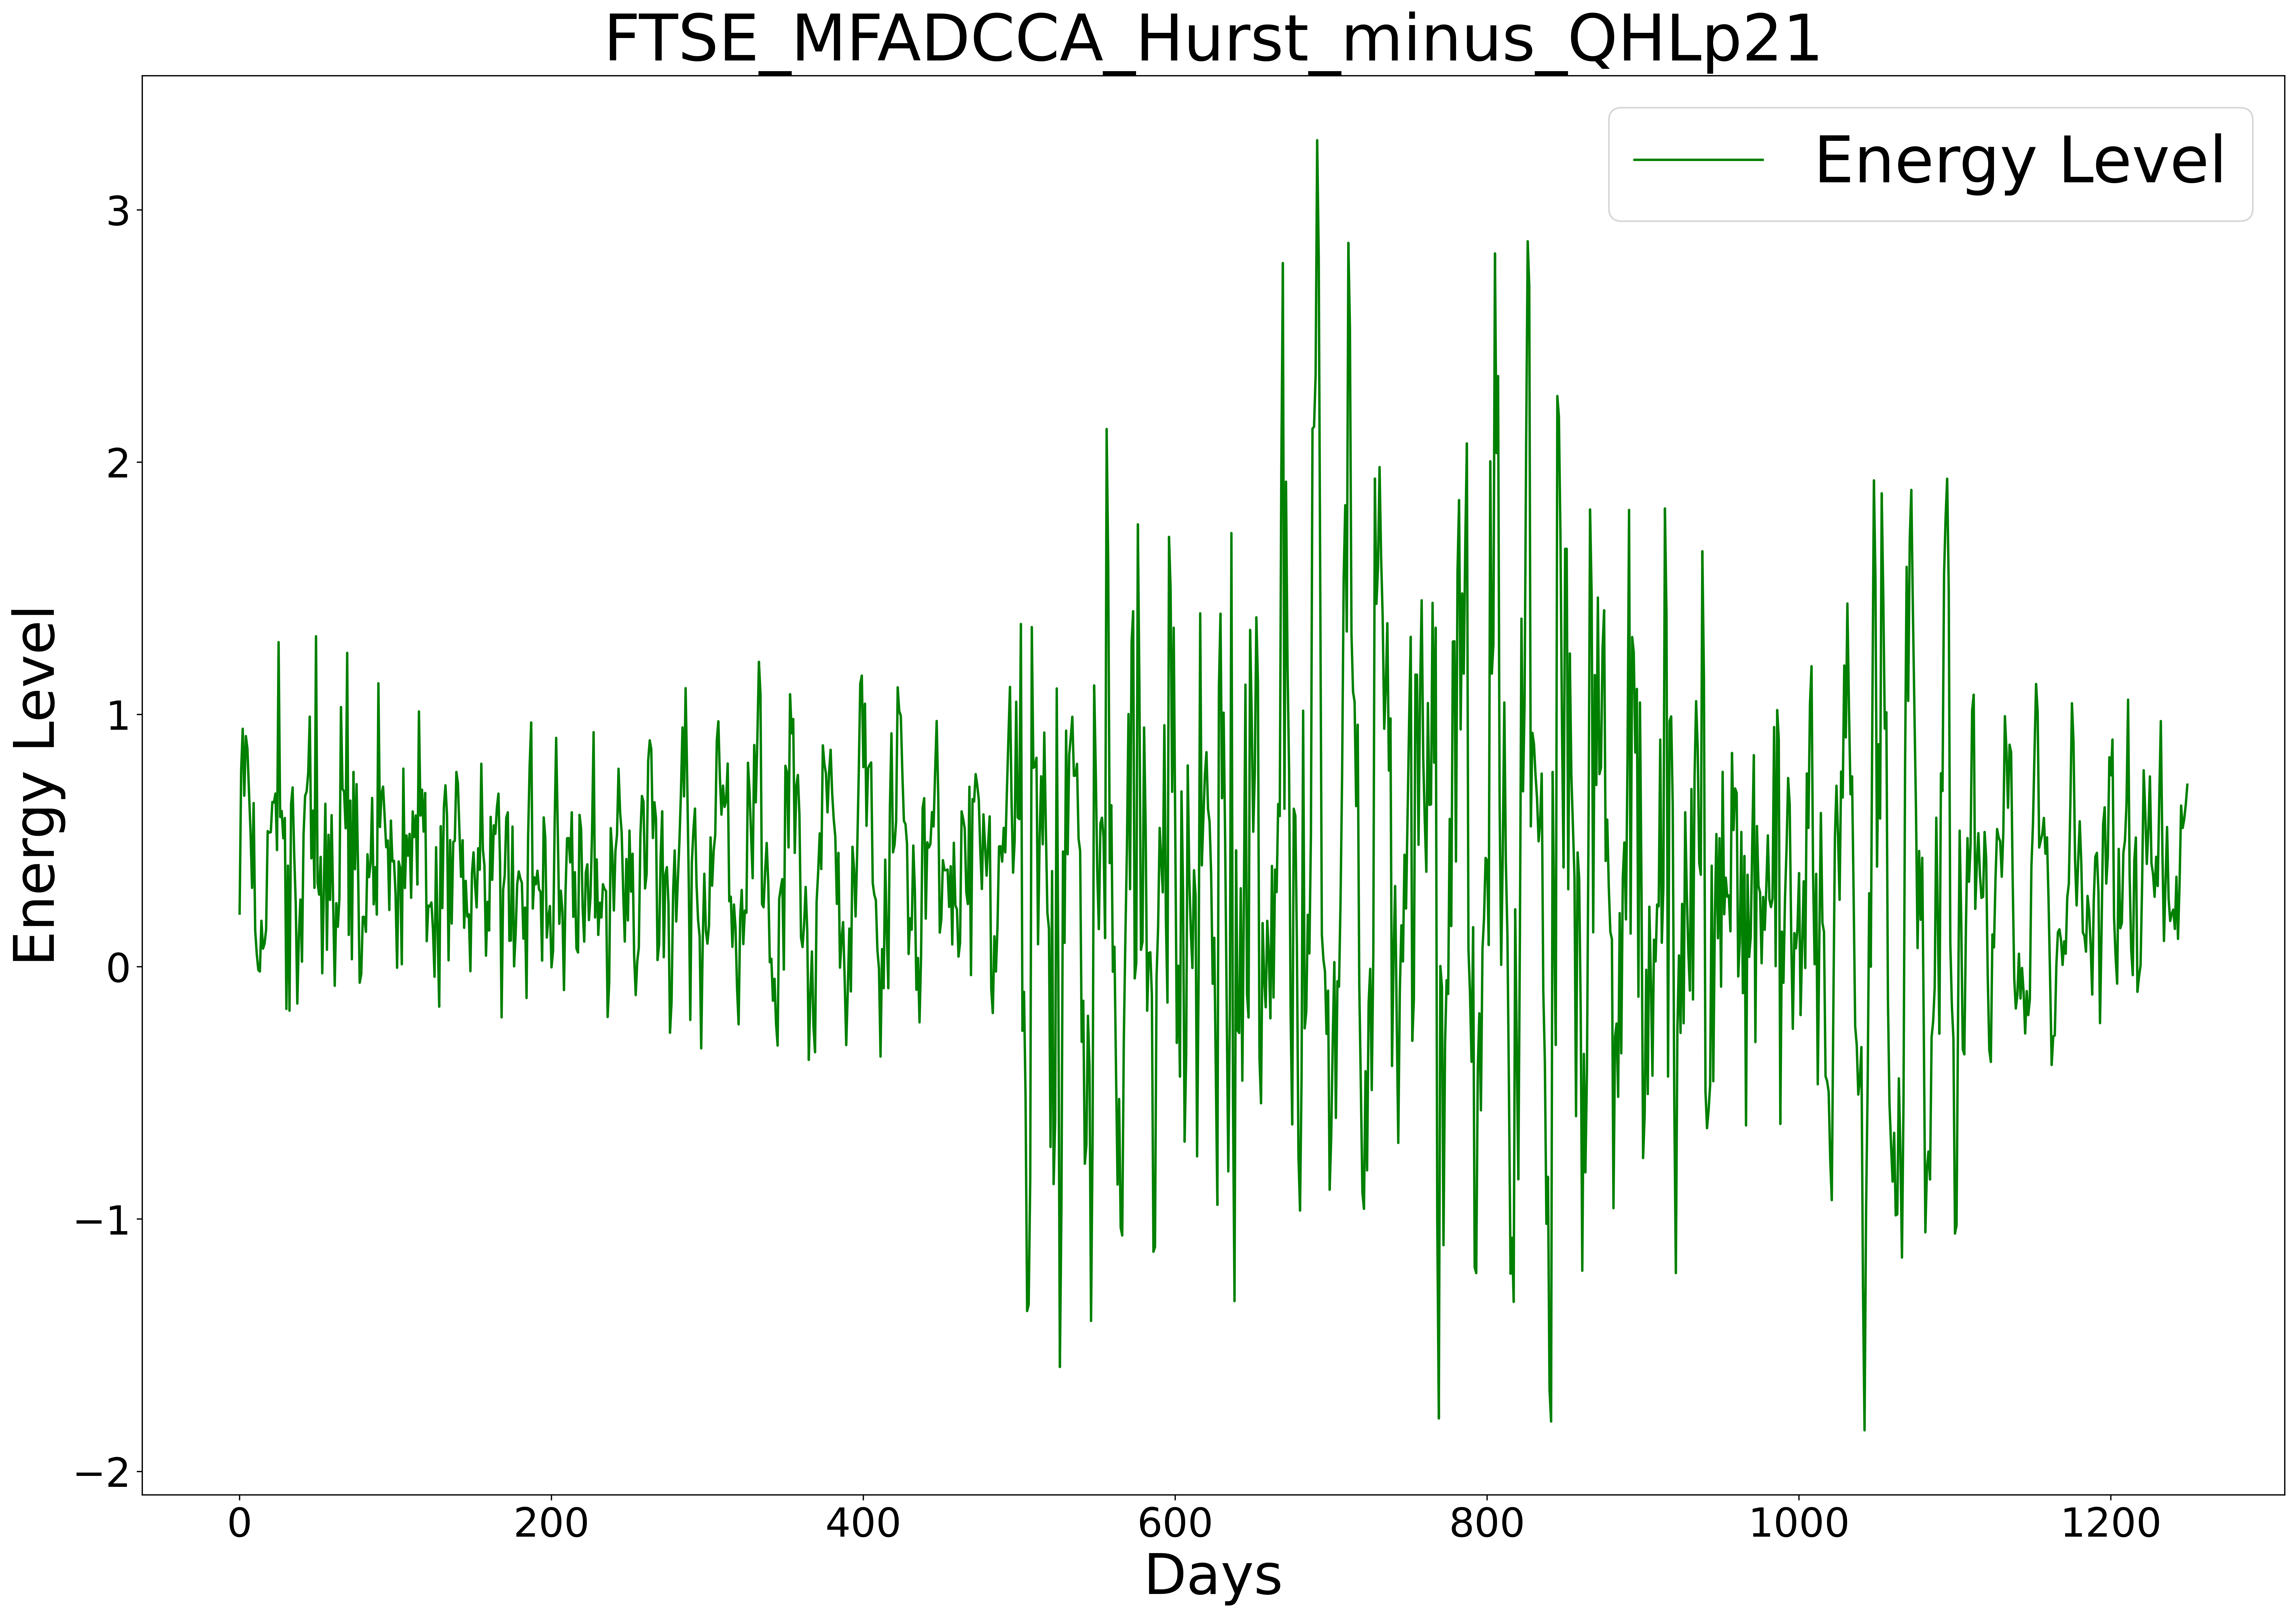

In [9]:
qplp21 = cQHLdata["hQHLp21"]
qpln21 = cQHLdata["hQHLn21"]

plt.figure(figsize=(24, 16), dpi=400)
plt.plot(qplp21,color='g')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Days', fontsize=35)
plt.ylabel('Energy Level', fontsize=35)
plt.title('FTSE_MFADCCA_Hurst_minus_QHLp21', fontsize=40)
plt.legend(['Energy Level'],fontsize=40)
plt.savefig('./pic/FTSE_pic/FTSE_MFADCCA_Hurst_minus_QHLp21.png')
plt.show()